The aim of this project is to analyse the best markets to advertise in.

In [174]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from itertools import chain

In [175]:
df = pd.read_csv('2017-fCC-New-Coders-Survey-Data.csv')
df.head(10)

/dataquest/system/env/python3/lib/python3.4/site-packages/IPython/core/interactiveshell.py:2723: DtypeWarning:

Columns (17,62) have mixed types. Specify dtype option on import or set low_memory=False.



,Age,AttendedBootcamp,BootcampFinish,BootcampLoanYesNo,BootcampName,BootcampRecommend,ChildrenNumber,CityPopulation,CodeEventConferences,CodeEventDjangoGirls,...,YouTubeFCC,YouTubeFunFunFunction,YouTubeGoogleDev,YouTubeLearnCode,YouTubeLevelUpTuts,YouTubeMIT,YouTubeMozillaHacks,YouTubeOther,YouTubeSimplilearn,YouTubeTheNewBoston
0,27.0,0.0,NaN,NaN,NaN,NaN,NaN,more than 1 million,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,34.0,0.0,NaN,NaN,NaN,NaN,NaN,"less than 100,000",NaN,NaN,...,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,21.0,0.0,NaN,NaN,NaN,NaN,NaN,more than 1 million,NaN,NaN,...,NaN,NaN,NaN,1.0,1.0,NaN,NaN,NaN,NaN,NaN
3,26.0,0.0,NaN,NaN,NaN,NaN,NaN,"between 100,000 and 1 million",NaN,NaN,...,1.0,1.0,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN
4,20.0,0.0,NaN,NaN,NaN,NaN,NaN,"between 100,000 and 1 million",NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,28.0,0.0,NaN,NaN,NaN,NaN,NaN,"less than 100,000",NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,CodingEntrepreneurs,NaN,1.0
6,29.0,0.0,NaN,NaN,NaN,NaN,NaN,"between 100,000 and 1 million",1.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,29.0,0.0,NaN,NaN,NaN,NaN,NaN,"between 100,000 and 1 million",NaN,NaN,...,1.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0
8,23.0,0.0,NaN,NaN,NaN,NaN,NaN,"less than 100,000",NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,24.0,0.0,NaN,NaN,NaN,NaN,NaN,more than 1 million,1.0,NaN,...,1.0,1.0,NaN,1.0,1.0,1.0,NaN,NaN,NaN,1.0


In [176]:
for col in df.columns:
    print(col)

Age
AttendedBootcamp
BootcampFinish
BootcampLoanYesNo
BootcampName
BootcampRecommend
ChildrenNumber
CityPopulation
CodeEventConferences
CodeEventDjangoGirls
CodeEventFCC
CodeEventGameJam
CodeEventGirlDev
CodeEventHackathons
CodeEventMeetup
CodeEventNodeSchool
CodeEventNone
CodeEventOther
CodeEventRailsBridge
CodeEventRailsGirls
CodeEventStartUpWknd
CodeEventWkdBootcamps
CodeEventWomenCode
CodeEventWorkshops
CommuteTime
CountryCitizen
CountryLive
EmploymentField
EmploymentFieldOther
EmploymentStatus
EmploymentStatusOther
ExpectedEarning
FinanciallySupporting
FirstDevJob
Gender
GenderOther
HasChildren
HasDebt
HasFinancialDependents
HasHighSpdInternet
HasHomeMortgage
HasServedInMilitary
HasStudentDebt
HomeMortgageOwe
HoursLearning
ID.x
ID.y
Income
IsEthnicMinority
IsReceiveDisabilitiesBenefits
IsSoftwareDev
IsUnderEmployed
JobApplyWhen
JobInterestBackEnd
JobInterestDataEngr
JobInterestDataSci
JobInterestDevOps
JobInterestFrontEnd
JobInterestFullStack
JobInterestGameDev
JobInterestInfoSec


In [177]:
cols = [
    'Age',
    'AttendedBootcamp',
    'CountryLive',
    'CountryCitizen',
    'JobRoleInterest',
    'MoneyForLearning',
    'MonthsProgramming'
]
df = df[cols]

The Website offers courses for programmers. According to our aim we want to check if there are people with sufficient interests in the fields - Web Development, Mobile Development, Game development, Data Science etc, we first see generally how interested people are in these fields.<br><br>
Many people have a list of interests. Since we want to find the percentage of people interested in a particular field, we will calculate based on the number of times the field is mentioned.

In [178]:
Job_interests = df.JobRoleInterest.str.split(',').dropna()
flattened = np.array(list(chain(*Job_interests)))
Top_10_fields = pd.Series(flattened).str.strip().str.lower().value_counts(normalize=True).sort_values(ascending=False).iloc[:10]
Top_10_fields

full-stack web developer    0.185752
front-end web developer     0.156327
back-end web developer      0.122655
mobile developer            0.101991
data scientist              0.072699
game developer              0.072035
user experience designer    0.065000
information security        0.058673
data engineer               0.055221
devops / sysadmin           0.041018
dtype: float64

/dataquest/system/env/python3/lib/python3.4/site-packages/seaborn/categorical.py:1428: FutureWarning:

remove_na is deprecated and is a private function. Do not use.



([], <a list of 0 Text xticklabel objects>)

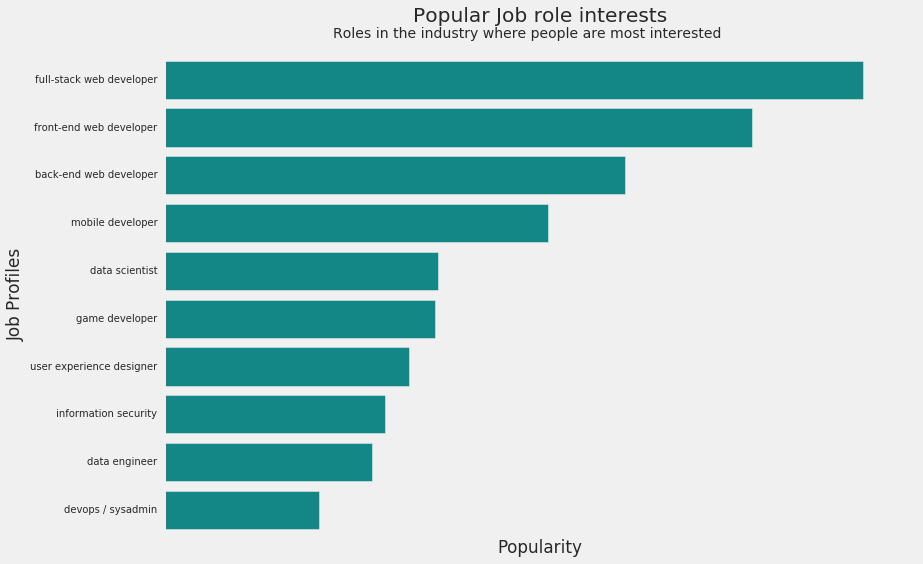

In [179]:
%matplotlib inline
plt.style.use('fivethirtyeight')
plt.figure(figsize=(12,8))
sns.barplot(
    y= Top_10_fields.index,
    x= Top_10_fields.values,
    orient= 'h',
    color='#009999'
)
plt.title('Popular Job role interests',y=1.06)
plt.suptitle('Roles in the industry where people are most interested',y=0.95)
plt.ylabel('Job Profiles')
plt.xlabel('Popularity')
plt.xticks([])

These percentages as popularity are not an absolute representation as we have intersecting people (due to people having multiple interests). Due to people having multiple interests, we assume they would try to pursue either of them or many of them and hence we have to take all their choices in account.

Now that we know that the coders on this website are interested in the categories pertaining to our goal. Let us analyze the locations of these coders. We have two columns `CountryCitizen` which describes where the coder hails from and `CountryLive` where the coder currently lives. For our analysis, `CountryLive` is relevant.<br>
We are going with the assumption that each country is an individual market and hence our goal subsequently becomes to find the best countries with good number of potential customers.

Those customers who haven't answered the question about their Job interests in `JobRoleInterest`, we can neglect those customers.

In [180]:
df = df[~df.JobRoleInterest.isna()]

In [181]:
Top_5_country = df.CountryLive.value_counts(normalize=True).iloc[:5]
Top_5_country

United States of America    0.457005
India                       0.077216
United Kingdom              0.046066
Canada                      0.038023
Poland                      0.019158
Name: CountryLive, dtype: float64

/dataquest/system/env/python3/lib/python3.4/site-packages/seaborn/categorical.py:1428: FutureWarning:

remove_na is deprecated and is a private function. Do not use.



([], <a list of 0 Text xticklabel objects>)

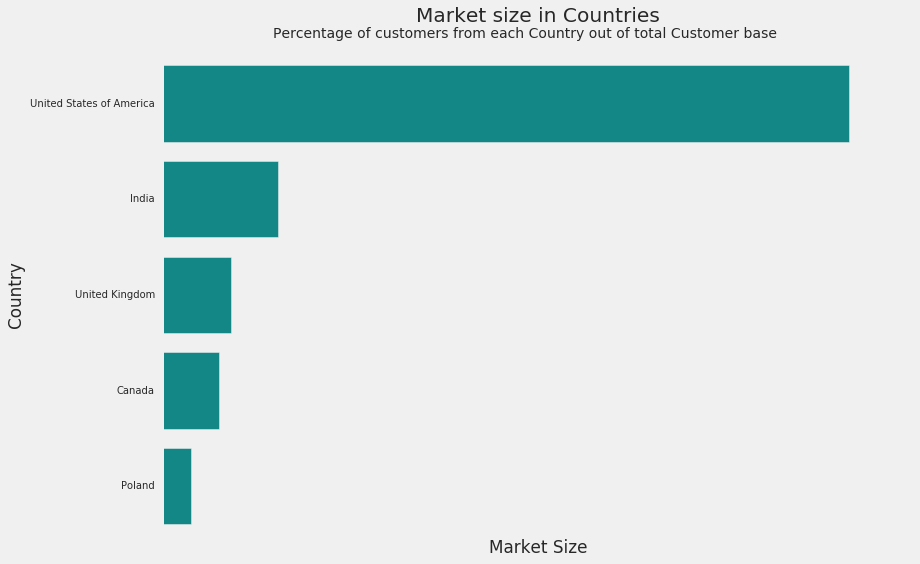

In [182]:
plt.style.use('fivethirtyeight')
plt.figure(figsize=(12,8))
sns.barplot(
    y= Top_5_country.index,
    x= Top_5_country.values,
    orient = 'h',
    color= '#009999'
)
plt.title('Market size in Countries',y=1.06)
plt.suptitle('Percentage of customers from each Country out of total Customer base',y=0.95)
plt.xlabel('Market Size')
plt.ylabel('Country')
plt.xticks([])

The market size doesn't always translate to potential customers. Within this market of programmers who want to learn, we have to segreggate it on the basis of how much money they can spend for it.<br>
This gives us an idea of the kind of customers the market contains, as well as good enough price points that are lucrative to the customer.

We have the columns `MoneyForLearning` and `MonthProgramming` that can be used to estimate the rough amount a customer spends per month to learn in dollars.<br>
There are customers with `MonthsProgrmming` as 0, they might have just started and hence we will replace the 0s with 1.

In [183]:
mask = (df.MonthsProgramming == 0)
df.MonthsProgramming = df.MonthsProgramming.mask(mask,1)

In [184]:
df['spend_per_month'] = df.MoneyForLearning / df.MonthsProgramming
df[['MoneyForLearning','MonthsProgramming','spend_per_month']].head(7)

,MoneyForLearning,MonthsProgramming,spend_per_month
1,80.0,6.0,13.333333
2,1000.0,5.0,200.000000
3,0.0,5.0,0.000000
4,0.0,24.0,0.000000
6,0.0,12.0,0.000000
9,100.0,18.0,5.555556
11,0.0,1.0,0.000000


In [185]:
df.spend_per_month.isna().sum()

675

We will remove the rows that have NaN in `spend_per_month` and `CountryLive` as they do not add to our analysis.

In [186]:
df = df[~((df.spend_per_month.isna()) | (df.CountryLive.isna()))]
df.head(2)

,Age,AttendedBootcamp,CountryLive,CountryCitizen,JobRoleInterest,MoneyForLearning,MonthsProgramming,spend_per_month
1,34.0,0.0,United States of America,United States of America,Full-Stack Web Developer,80.0,6.0,13.333333
2,21.0,0.0,United States of America,United States of America,"Front-End Web Developer, Back-End Web Develo...",1000.0,5.0,200.000000


Now let us find out the average spending rate of customers per month, country wise (market wise). We group by `CountryLive` and aggregate on the `spend_per_month` using mean.

In [187]:
grouped = df[['CountryLive','spend_per_month']].groupby(['CountryLive'])
spending_power = grouped.mean()
spending_power.sort_values('spend_per_month',ascending=False)

,spend_per_month
CountryLive,
Yemen,10000.000000
Puerto Rico,4291.394558
Austria,936.208333
Spain,784.553084
Jamaica,747.037037
Hong Kong,523.341049
Trinidad & Tobago,500.000000
Australia,419.268452
Taiwan,417.966524


We had zeroed down on the top 5 countries with respect to market size. So let us look at the spending power of customers for those 5 countries.

In [188]:
countries = list(Top_5_country.index)
spending_power.loc[countries]

,spend_per_month
CountryLive,
United States of America,227.997996
India,135.100982
United Kingdom,45.534443
Canada,113.510961
Poland,75.678935


The table above is not a correct representative of the actual story. Countries like United Kingdom and Canada have lesser spending power than India. Looking into the socio-economic background of countries we find that United Kingdom and Canada must have more spending power in general as compared to India. <br>
The spending power derived is per customer metric. India has a high spend_per_month due to the sheer size of population and variability whereas United Kingdom and Canada have less representative data.
We could also be having outliers in the data that give such extreme resuts.

To locate outliers we will plot a boxplot for each country with respect to the variable `spend_per_month`

/dataquest/system/env/python3/lib/python3.4/site-packages/seaborn/categorical.py:454: FutureWarning:

remove_na is deprecated and is a private function. Do not use.



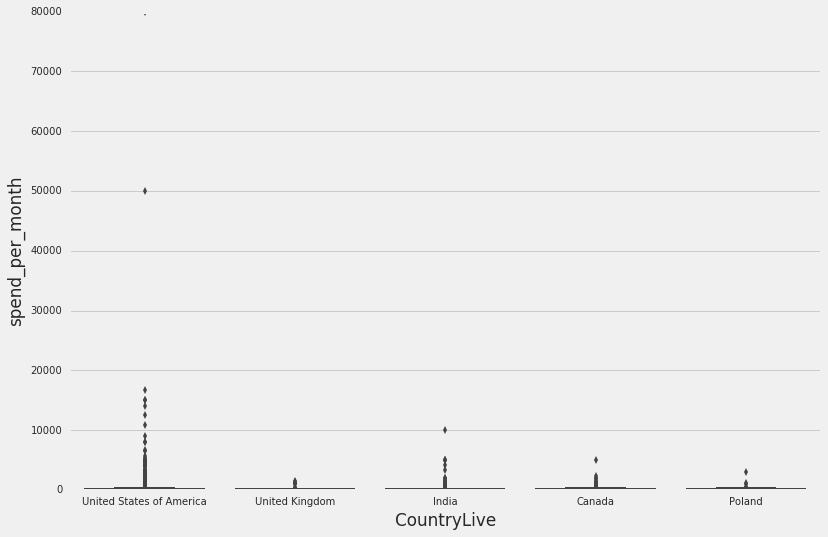

In [189]:
plt.style.use('fivethirtyeight')
plt.figure(figsize=(12,8))
sns.boxplot(
    y='spend_per_month',
    x='CountryLive',
    data= df[df.CountryLive.str.contains(
        'United States of America|India|United Kingdom|Canada|Poland'
    )]
)

We can clearly find some outliers that very extreme. Hence let us set a boundry of 10000 and remove any spending beyond 10000.<br>

In [190]:
df = df[~(df.spend_per_month > 10000)]

Let us plot the boxplot again and further analyze the distributions for outliers. Think of it as maginfying further

/dataquest/system/env/python3/lib/python3.4/site-packages/seaborn/categorical.py:454: FutureWarning:

remove_na is deprecated and is a private function. Do not use.



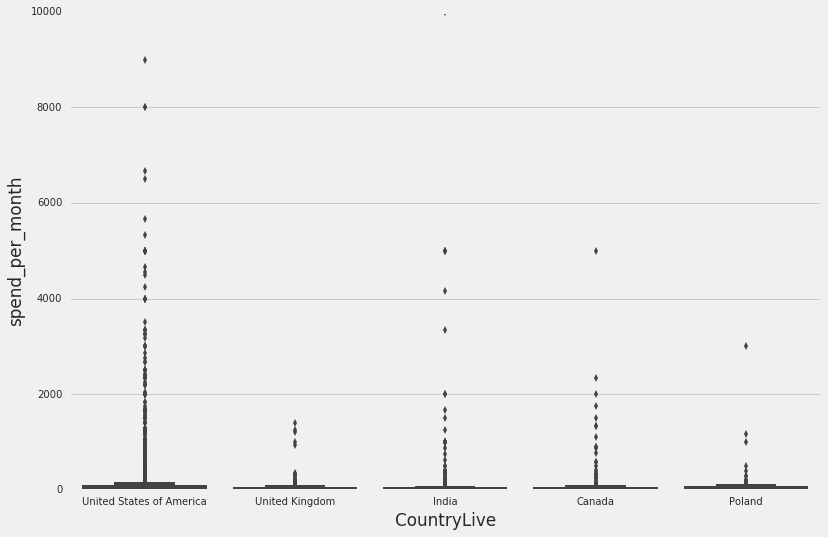

In [191]:
plt.style.use('fivethirtyeight')
plt.figure(figsize=(12,8))
sns.boxplot(
    y='spend_per_month',
    x='CountryLive',
    data= df[df.CountryLive.str.contains(
        'United States of America|India|United Kingdom|Canada|Poland'
    )]
)

We still find a high number of outliers for all the countries. Let us try to look at those customers who have `spend_per_month` greater than 1500. If the customer has ever participated in a bootcamp then such a spenditure is valid, else it is probably faulty data.<br>

First let us look at India.

In [192]:
mask = (df.spend_per_month > 1500) & (df.CountryLive == 'India')
df[mask]

,Age,AttendedBootcamp,CountryLive,CountryCitizen,JobRoleInterest,MoneyForLearning,MonthsProgramming,spend_per_month
1728,24.0,0.0,India,India,"User Experience Designer, Mobile Developer...",20000.0,4.0,5000.000000
1755,20.0,0.0,India,India,"Information Security, Full-Stack Web Developer...",50000.0,15.0,3333.333333
6913,21.0,1.0,India,India,"Mobile Developer, Full-Stack Web Developer, ...",5000.0,3.0,1666.666667
7989,28.0,0.0,India,India,"User Experience Designer, Back-End Web Devel...",5000.0,1.0,5000.000000
8126,22.0,0.0,India,India,"Back-End Web Developer, Full-Stack Web Develop...",5000.0,1.0,5000.000000
9410,38.0,0.0,India,India,"User Experience Designer, Data Scientist, ...",2000.0,1.0,2000.000000
12451,24.0,0.0,India,India,"Mobile Developer, Front-End Web Developer",8000.0,4.0,2000.000000
13398,19.0,0.0,India,India,Mobile Developer,20000.0,2.0,10000.000000
15587,27.0,0.0,India,India,"Full-Stack Web Developer, Data Scientist",100000.0,24.0,4166.666667


We see that only one of them has attended a bootcamp, but that customer also has been programming for 3 months only. This means that customer is unlikely to spend any money for the next few months. Since a customer has recently enrolled in a bootcamp and is likely in the middle of one, that customer is likely to purchase anything more.<br>

So we will remove all these customers.

In [193]:
df = df[~mask]

Now let us take a look at the countries - United Kingdom, Canada and Poland.

In [194]:
mask = (df.spend_per_month > 1500) & (df.CountryLive == 'United Kingdom')
df[mask]

,Age,AttendedBootcamp,CountryLive,CountryCitizen,JobRoleInterest,MoneyForLearning,MonthsProgramming,spend_per_month


In [195]:
mask = (df.spend_per_month > 1500) & (df.CountryLive == 'Canada')
df[mask]

,Age,AttendedBootcamp,CountryLive,CountryCitizen,JobRoleInterest,MoneyForLearning,MonthsProgramming,spend_per_month
6590,20.0,1.0,Canada,Canada,"Game Developer, Mobile Developer",14023.0,6.0,2337.166667
7193,22.0,0.0,Canada,Kazakhstan,"Back-End Web Developer, Game Developer",21000.0,12.0,1750.000000
8726,39.0,0.0,Canada,Canada,"Full-Stack Web Developer, Back-End Web Develop...",2000.0,1.0,2000.000000
13659,24.0,1.0,Canada,Canada,"Mobile Developer, Full-Stack Web Developer, ...",10000.0,2.0,5000.000000


Similar to India, Canada also has such outliers where either the spending is big without a bootcamp enrollment or a fresh enrollment into a bootcamp. Thus we will remove these customers.

In [196]:
df = df[~((mask) & (df.AttendedBootcamp == 0))]
df = df[~(mask & (df.MonthsProgramming <= 3))]

/dataquest/system/env/python3/lib/python3.4/site-packages/ipykernel/__main__.py:2: UserWarning:

Boolean Series key will be reindexed to match DataFrame index.



In [197]:
mask = (df.spend_per_month > 1500) & (df.CountryLive == 'Poland')
df[mask]

,Age,AttendedBootcamp,CountryLive,CountryCitizen,JobRoleInterest,MoneyForLearning,MonthsProgramming,spend_per_month
1040,28.0,1.0,Poland,Poland,"Full-Stack Web Developer, Front-End Web Deve...",3000.0,1.0,3000.0


For poland as well, we will remove the customer

In [198]:
df = df[~mask]

Now let us look at United States of America. It seems to have the most number of outliers.

In [199]:
mask = (df.spend_per_month > 1500) & (df.CountryLive == 'United States of America')
df[mask]

,Age,AttendedBootcamp,CountryLive,CountryCitizen,JobRoleInterest,MoneyForLearning,MonthsProgramming,spend_per_month
415,26.0,1.0,United States of America,United States of America,"Full-Stack Web Developer, Front-End Web Deve...",14000.0,6.0,2333.333333
441,30.0,1.0,United States of America,United States of America,"Back-End Web Developer, Information Security, ...",9000.0,4.0,2250.000000
484,25.0,1.0,United States of America,United States of America,"Full-Stack Web Developer, Front-End Web Deve...",20000.0,7.0,2857.142857
718,26.0,1.0,United States of America,United States of America,"User Experience Designer, Full-Stack Web Dev...",8000.0,1.0,8000.000000
723,22.0,1.0,United States of America,Canada,"User Experience Designer, Front-End Web De...",20000.0,5.0,4000.000000
841,31.0,1.0,United States of America,United States of America,Full-Stack Web Developer,18000.0,9.0,2000.000000
1152,32.0,1.0,United States of America,United States of America,Full-Stack Web Developer,4000.0,2.0,2000.000000
1222,32.0,1.0,United States of America,United States of America,"Front-End Web Developer, Mobile Developer,...",13000.0,2.0,6500.000000
1334,27.0,1.0,United States of America,United States of America,Full-Stack Web Developer,17000.0,7.0,2428.571429
1370,28.0,1.0,United States of America,United States of America,"Information Security, Mobile Developer, Full...",16000.0,8.0,2000.000000


The United States of America also has several outliers. Many with high spending and no enrollment in Bootcamps. There are many who have enrolled in Bootcamps but are new to Programming i.e. less than 3 months. We will remove all these customers.

In [200]:
df = df[~((mask) & (df.AttendedBootcamp == 0))]
df = df[~((mask) & (df.MonthsProgramming <= 3))]

/dataquest/system/env/python3/lib/python3.4/site-packages/ipykernel/__main__.py:2: UserWarning:

Boolean Series key will be reindexed to match DataFrame index.



Now that we have removed the outliers, let us again group the data as before to observe the spending power for these top 5 countries.

In [203]:
grouped = df[['CountryLive','spend_per_month']].groupby(['CountryLive'])
spending_power = grouped.mean()
spending_power.sort_values('spend_per_month',ascending=False)

,spend_per_month
CountryLive,
Yemen,10000.000000
Jamaica,747.037037
Hong Kong,523.341049
Trinidad & Tobago,500.000000
Taiwan,417.966524
Luxembourg,338.817664
Norway,318.914815
New Zealand,316.171958
Chile,300.416667


In [206]:
countries = list(Top_5_country.index)
Countries_of_interest = spending_power.loc[countries]
Countries_of_interest

,spend_per_month
CountryLive,
United States of America,104.748452
India,53.711648
United Kingdom,45.534443
Canada,78.027977
Poland,51.510992


We see the spending powers for countries have changed and significantly come closer like India, United Kingdom and Poland.

Let us plot these to get a visual aid in exploring the best markets.

/dataquest/system/env/python3/lib/python3.4/site-packages/seaborn/categorical.py:1428: FutureWarning:

remove_na is deprecated and is a private function. Do not use.



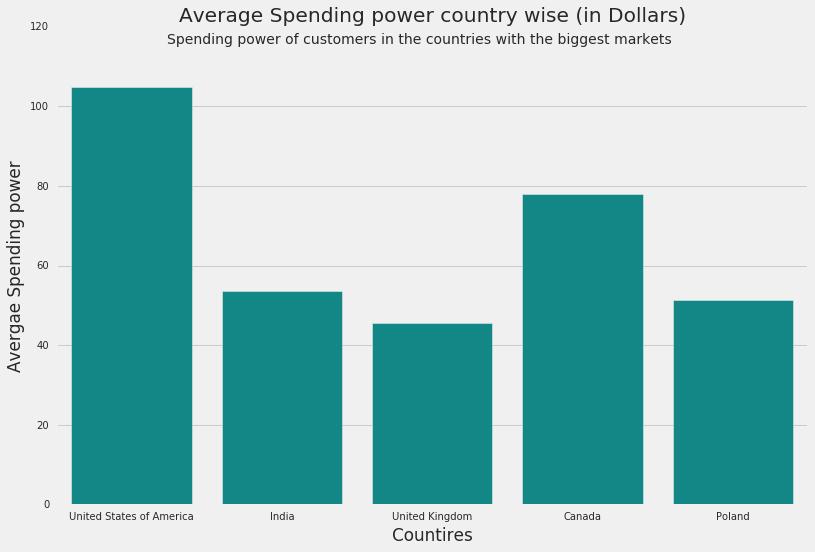

In [218]:
plt.style.use('fivethirtyeight')
plt.figure(figsize=(12,8))
sns.barplot(
    x=Countries_of_interest.index,
    y=Countries_of_interest.spend_per_month,
    color= '#009999'
)
plt.xlabel('Countires')
plt.ylabel('Avergae Spending power')
plt.title('Average Spending power country wise (in Dollars)',y=1.0)
plt.suptitle('Spending power of customers in the countries with the biggest markets',y=0.89)


Using these results, let us try to understand potential customers. 
Let us assume that customers with Spending power greater than the average of the country can be a potential customer. <br>

With this assumption, we will narrow down on customers who can be potential customers.

In [262]:
potential_customer_count ={}

total_pop = len(df)

for country in Countries_of_interest.index:
    mask = (
        (df.CountryLive == country) &
        (df.spend_per_month >= Countries_of_interest.loc[country].spend_per_month)
    )
    potential_customer_count[country] = len(df[mask]) / total_pop

potential_customers = pd.Series(potential_customer_count).loc[countries]
potential_customers

United States of America    0.069499
India                       0.011393
United Kingdom              0.007975
Canada                      0.005208
Poland                      0.003255
dtype: float64

Gathering the percentages of all potential customers, let us compare this with the market size, to find the best markets.

In [261]:
Top_5_country

United States of America    0.457005
India                       0.077216
United Kingdom              0.046066
Canada                      0.038023
Poland                      0.019158
Name: CountryLive, dtype: float64

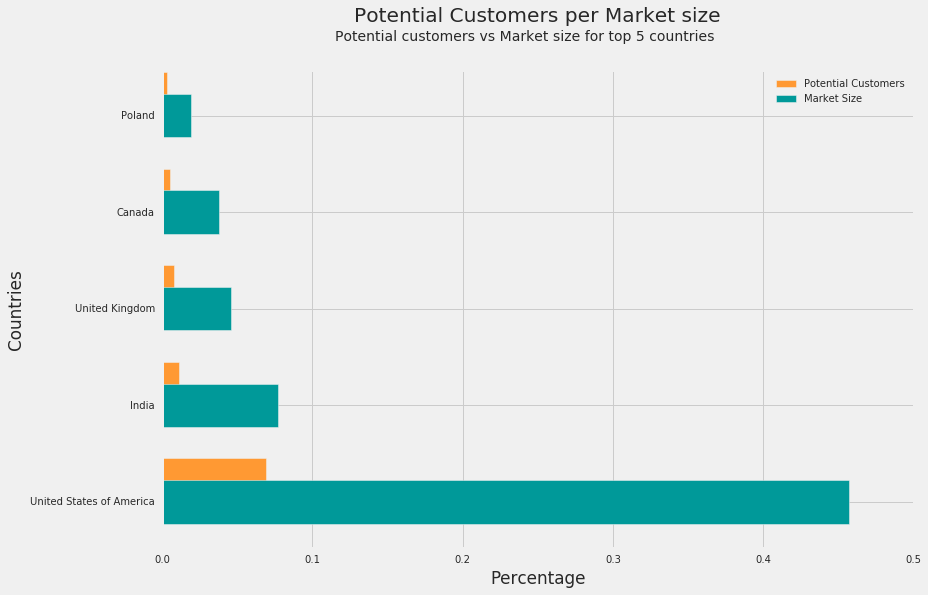

In [274]:
plt.style.use('fivethirtyeight')
plt.figure(figsize=(12,8))
potential_customers.plot.barh(align='edge',color='#ff9933',width=0.45,label='Potential Customers')
Top_5_country.plot.barh(align='center',color='#009999',width=0.45,label='Market Size')
plt.ylabel('Countries')
plt.xlabel('Percentage')
plt.title('Potential Customers per Market size',y=1.09)
plt.suptitle('Potential customers vs Market size for top 5 countries',y=0.97)
plt.legend()

We can see the potential customers in these countries with respect to their market size. Though this plot gives us a good comparision of potential customers of a country and it's Market size, we cannot make comparision across countries. <br>

To viualize across countries let us plot the percentage of potential customers per market size.

In [278]:
percentages = (potential_customers / Top_5_country) * 100
percentages

United States of America    15.207427
India                       14.755095
United Kingdom              17.312645
Canada                      13.697917
Poland                      16.991691
dtype: float64

/dataquest/system/env/python3/lib/python3.4/site-packages/seaborn/categorical.py:1428: FutureWarning:

remove_na is deprecated and is a private function. Do not use.



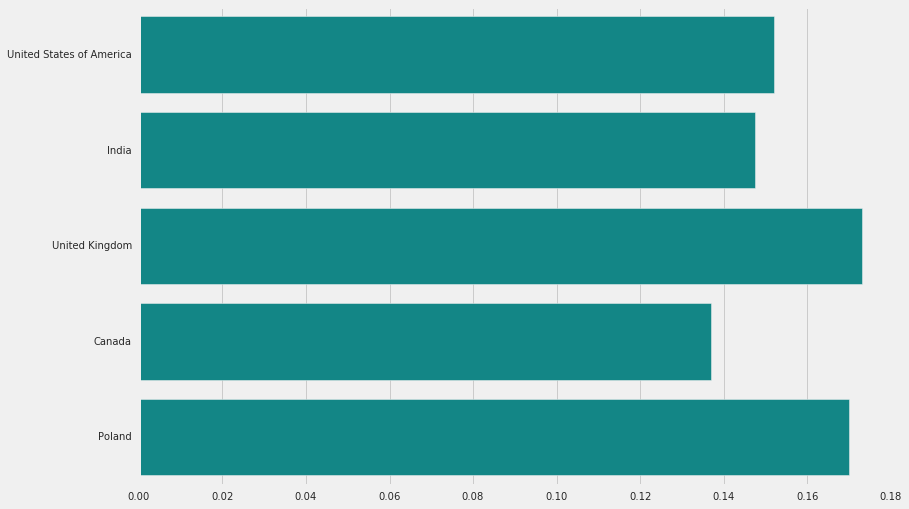

In [277]:
plt.style.use('fivethirtyeight')
plt.figure(figsize=(12,8))
sns.barplot(y=percentages.index,x=percentages.values,orient='h',color='#009999')
plt.ylabel('Country')
plt.xlabel('Percentage of Potential Customers')